http://actionrecognition.net/files/dsetdetail.php?did=15;
https://github.com/epic-kitchens/annotations

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from childes_mi.utils.paths import DATA_DIR, ensure_dir, EPIC_KITCHENS_DIR
import urllib.request

In [3]:
import pandas as pd

In [4]:
actions_data = pd.read_csv(EPIC_KITCHENS_DIR / 'EPIC_train_action_labels.csv')

In [5]:
pd.read_csv(EPIC_KITCHENS_DIR / 'EPIC_train_action_labels.csv')

,uid,participant_id,video_id,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes
0,0,P01,P01_01,open door,00:00:00.14,00:00:03.37,8,202,open,2,door,8,['door'],[8]
1,1,P01,P01_01,turn on light,00:00:04.37,00:00:06.17,262,370,turn-on,12,light,113,['light'],[113]
2,2,P01,P01_01,close door,00:00:06.98,00:00:09.49,418,569,close,3,door,8,['door'],[8]
3,3,P01,P01_01,open fridge,00:00:12.77,00:00:13.99,766,839,open,2,fridge,10,['fridge'],[10]
4,4,P01,P01_01,take celery,00:00:15.25,00:00:16.40,915,983,take,0,celery,185,['celery'],[185]
5,5,P01,P01_01,take container,00:00:16.50,00:00:18.06,990,1083,take,0,container,29,['container'],[29]
6,6,P01,P01_01,take tofu,00:00:18.19,00:00:21.14,1091,1268,take,0,tofu,159,['tofu'],[159]
7,7,P01,P01_01,close fridge,00:00:21.91,00:00:23.33,1314,1399,close,3,fridge,10,['fridge'],[10]
8,8,P01,P01_01,open fridge,00:00:23.18,00:00:24.29,1390,1457,open,2,fridge,10,['fridge'],[10]
9,9,P01,P01_01,take carrots and,00:00:24.48,00:00:27.94,1468,1676,take,0,carrot,40,['carrot'],[40]


In [6]:
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [7]:
actions = [actions_data[actions_data.video_id == vid].verb_class.values for vid in tqdm(actions_data.video_id.unique())]

In [8]:
actions_name = [[actions_data[actions_data.video_id == vid].verb.values, actions_data[actions_data.video_id == vid].noun.values] for vid in tqdm(actions_data.video_id.unique())]

In [9]:
behav_lens = [len(i) for i in actions]

In [10]:
import matplotlib.pyplot as plt

In [11]:
import numpy as np

### MI

In [12]:
actions_resorted = np.array(actions)[np.argsort(behav_lens)[::-1]]

In [13]:
vids_resorted = actions_data.video_id.unique()[np.argsort(behav_lens)[::-1]]

In [14]:
len(actions_resorted[0])

879

In [15]:
from childes_mi.information_theory import mutual_information as mi

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.cluster.supervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics.cluster. Anything that cannot be imported from sklearn.metrics.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.cluster.expected_mutual_info_fast module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics.cluster. Anything that cannot be imported from sklearn.metrics.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [17]:
distances = np.arange(1,np.median(behav_lens)+1).astype('int')

### longest sequence

In [18]:
def quickplot_decay(distances, MI, shuff_MI, title=''):
    fig,axs = plt.subplots(ncols=2, figsize = (10,4))
    ax = axs[0]
    ax.set_title(title)
    ax.scatter(distances, MI-shuff_MI)
    ax.plot(distances, MI-shuff_MI, alpha = 0)
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax = axs[1]
    ax.scatter(distances, MI)
    ax.scatter(distances, shuff_MI)
    plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 878 out of 878 | elapsed:    3.7s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 878 out of 878 | elapsed:    0.2s finished


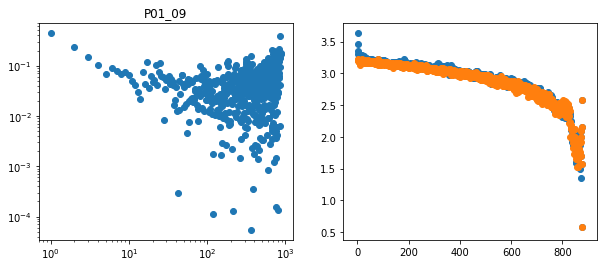

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 748 out of 748 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 748 out of 748 | elapsed:    0.2s finished


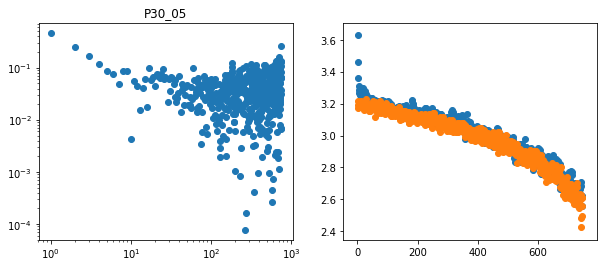

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 741 out of 741 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 741 out of 741 | elapsed:    0.2s finished


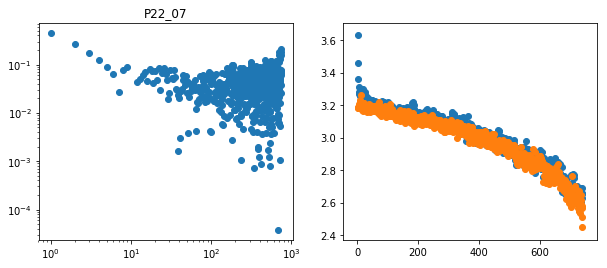

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:    0.2s finished


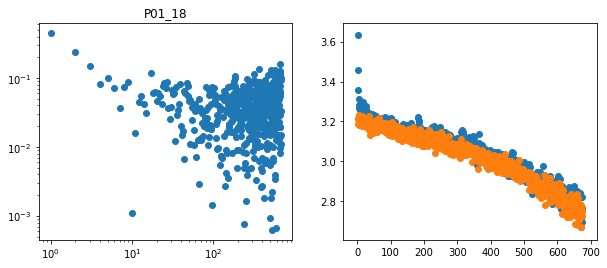

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of 567 | elapsed:    0.1s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 567 out of 567 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of 567 | elapsed:    0.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 567 out of 567 | elapsed:    0.2s finished


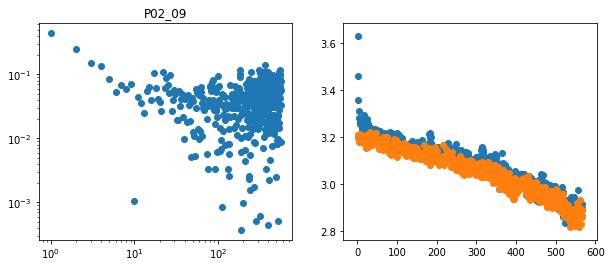

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  49 out of 564 | elapsed:    0.1s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 564 out of 564 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  49 out of 564 | elapsed:    0.1s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 388 out of 564 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 564 out of 564 | elapsed:    0.2s finished


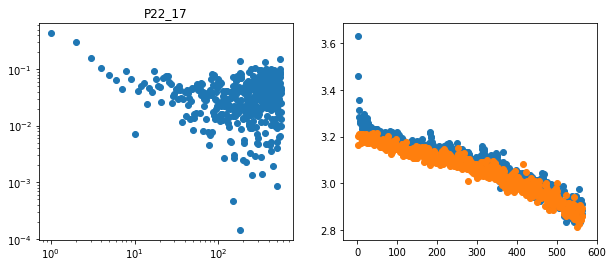

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of 527 | elapsed:    0.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 527 out of 527 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of 527 | elapsed:    0.1s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 527 out of 527 | elapsed:    0.2s finished


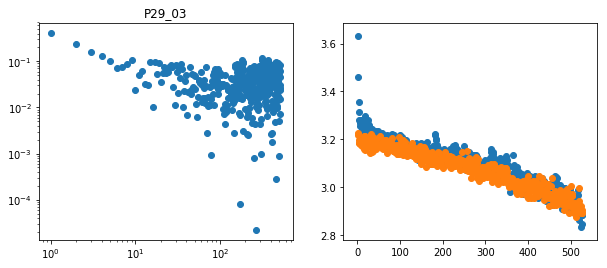

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of 527 | elapsed:    0.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 527 out of 527 | elapsed:    0.1s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of 527 | elapsed:    0.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 527 out of 527 | elapsed:    0.2s finished


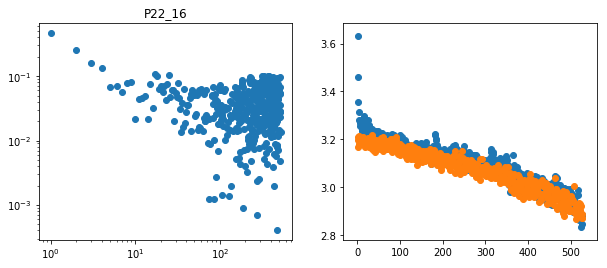

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  36 out of 507 | elapsed:    0.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 507 out of 507 | elapsed:    0.1s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of 507 | elapsed:    0.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 507 out of 507 | elapsed:    0.1s finished


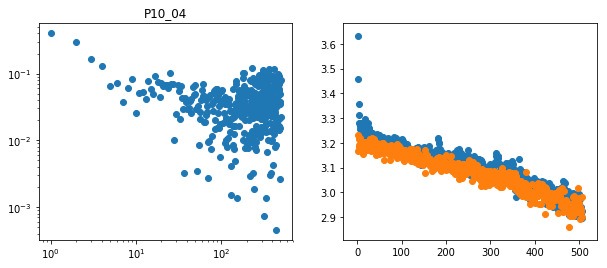

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  32 out of 491 | elapsed:    0.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 491 out of 491 | elapsed:    0.1s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  32 out of 491 | elapsed:    0.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 491 out of 491 | elapsed:    0.2s finished


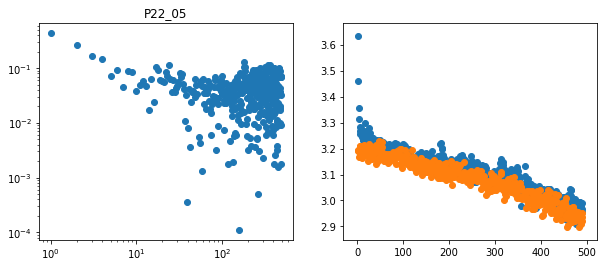

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of 428 | elapsed:    0.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 428 out of 428 | elapsed:    0.1s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of 428 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 428 out of 428 | elapsed:    0.2s finished


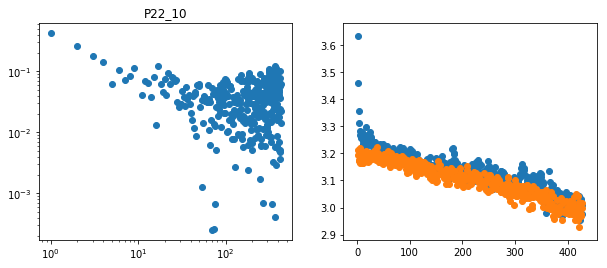

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of 395 | elapsed:    0.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 395 out of 395 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of 395 | elapsed:    0.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 395 out of 395 | elapsed:    0.2s finished


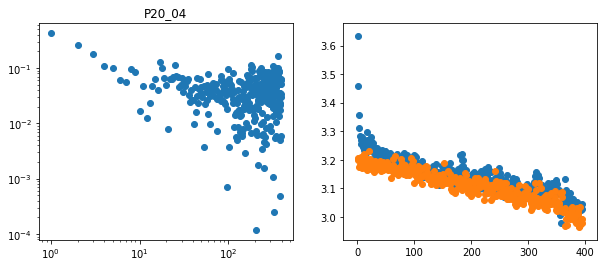

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of 384 | elapsed:    0.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of 384 | elapsed:    0.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:    0.2s finished


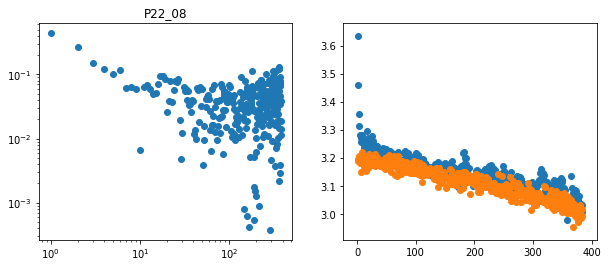

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 372 out of 372 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 372 out of 372 | elapsed:    0.1s finished


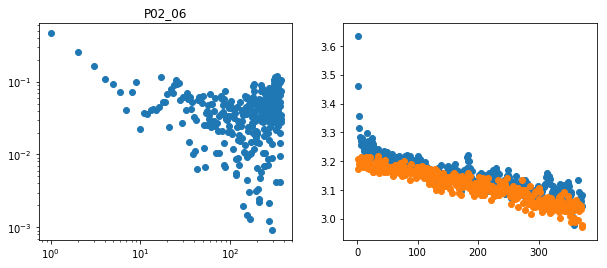

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 370 out of 370 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 370 out of 370 | elapsed:    0.1s finished


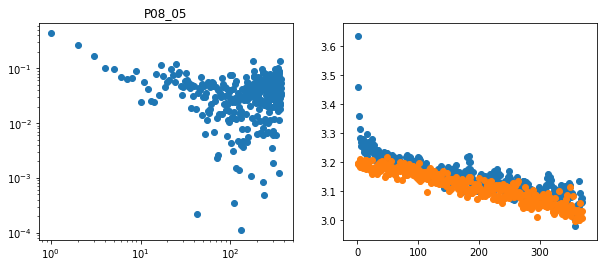

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 362 out of 362 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 362 out of 362 | elapsed:    0.1s finished


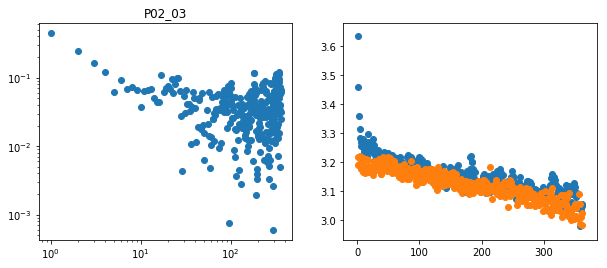

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    0.1s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    0.1s finished


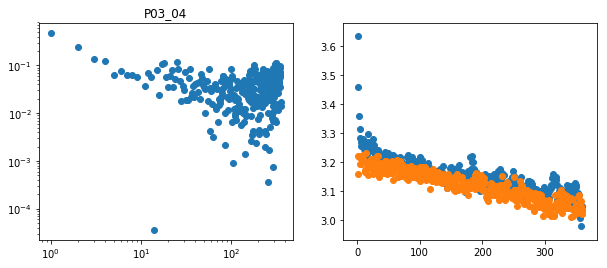

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    0.1s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    0.2s finished


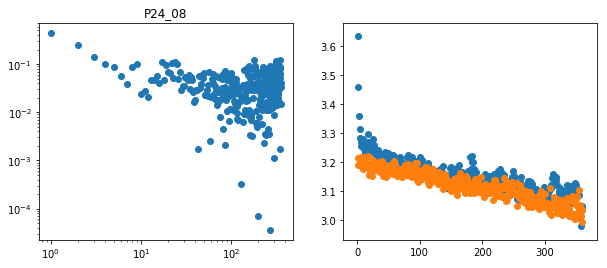

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 353 out of 353 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 353 out of 353 | elapsed:    0.1s finished


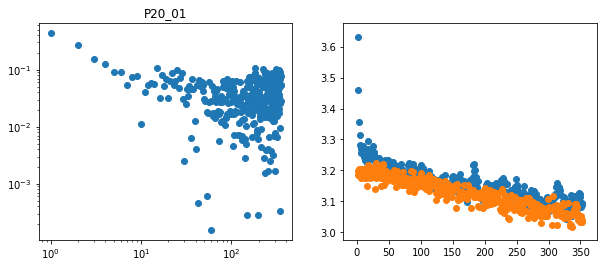

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 341 out of 341 | elapsed:    0.1s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  71 out of 341 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 341 out of 341 | elapsed:    0.2s finished


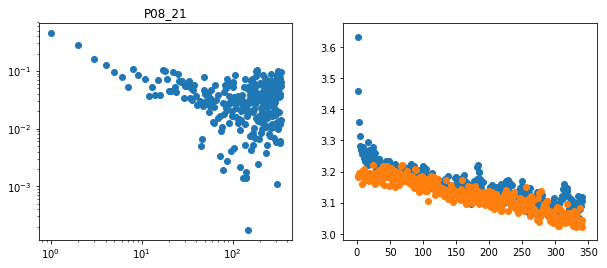

In [19]:
MI_DF = pd.DataFrame(
    columns=["MI", "MI_var", "shuff_MI", "shuff_MI_var", "distances", "seq", "seq_len", 'video_id'],
)
for vid, seq in tqdm(zip(vids_resorted[:20], actions_resorted[:20])):
    distances = np.arange(1, len(seq-1))
    (MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
        [actions[np.argmax(behav_lens)]], distances=distances, n_jobs=-1, estimate=True
    )
    
    MI_DF.loc[len(MI_DF)] = [MI, MI_var, shuff_MI, shuff_MI_var, distances, seq, len(seq), vid]
    quickplot_decay(distances, MI, shuff_MI, title=vid)

In [20]:
MI_DF[:3]

,MI,MI_var,shuff_MI,shuff_MI_var,distances,seq,seq_len,video_id
0,"[3.632823163404609, 3.4601848792965475, 3.3577...","[0.09071928900309506, 0.0893417844119914, 0.08...","[3.1896338894191434, 3.2220143271280373, 3.207...","[0.08845785666484869, 0.08838319260681769, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[17, 0, 1, 2, 0, 0, 0, 0, 3, 1, 0, 2, 1, 3, 0,...",879,P01_09
1,"[3.632823163404609, 3.4601848792965475, 3.3577...","[0.09071928900309506, 0.0893417844119914, 0.08...","[3.1701469802486315, 3.2141988608014174, 3.191...","[0.08830355090850997, 0.08819464243183989, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 9, ...",749,P30_05
2,"[3.632823163404609, 3.4601848792965475, 3.3577...","[0.09071928900309506, 0.0893417844119914, 0.08...","[3.1845290776983672, 3.187414575388204, 3.1814...","[0.0880553011796602, 0.08793265984255103, 0.08...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 0, 2, 0, 9, 0, 9, 2, 8, 3, 0, 2, 0, 0, 14,...",742,P22_07


In [21]:
MI_DF.to_pickle(DATA_DIR/'mi/epic_kitchens_longest.pickle')